In [ ]:
import numpy as np
import matplotlib.axes as mplax
import matplotlib.image as img
import matplotlib.pyplot as plt

# Data
Create an array of differential energy flux, `F(t,E)`, as a function of time, `t`, and energy, `E`. Time is linearly spaced while energy is logarithmically spaced.

In [2]:
# Time array
T = 100
dt = 1.0
t = np.arange(0, T, dt)
nt = t.size

# Energy array (log spaced)
E0 = 10.0
E1 = 20000.0
nE = 32
E = np.logspace(np.log(E0), np.log(E1), nE)

# Differential flux
F = np.random.normal(size=(nE, nt))

# NonUniformImage

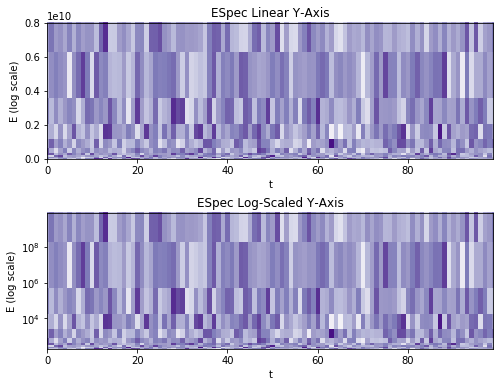

In [5]:
# Attempt to plot with NonUniformImage
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(8,6))
plt.subplots_adjust(hspace=0.4)

# Normal axes
ax = axes[0]
im = img.NonUniformImage(ax, interpolation='nearest', extent=(t[0], t[-1], E[0], E[-1]), cmap='Purples')
im.set_data(t, E, F)
ax.images.append(im)
ax.set_title('ESpec Linear Y-Axis')
ax.set_xlabel('t')
ax.set_xlim(t[0], t[-1])
ax.set_ylabel('E (log scale)')
ax.set_ylim(E[0], E[-1])

# Semi-log axes
ax = axes[1]
im = img.NonUniformImage(ax, interpolation='nearest', extent=(t[0], t[-1], E[0], E[-1]), cmap='Purples')
im.set_data(t, E, F)
ax.images.append(im)
ax.set_title('ESpec Log-Scaled Y-Axis')
ax.set_xlabel('t')
ax.set_xlim(t[0], t[-1])
ax.set_ylabel('E (log scale)')
ax.set_ylim(E[0], E[-1])
ax.set_yscale('log')

plt.show()

# PColorImage

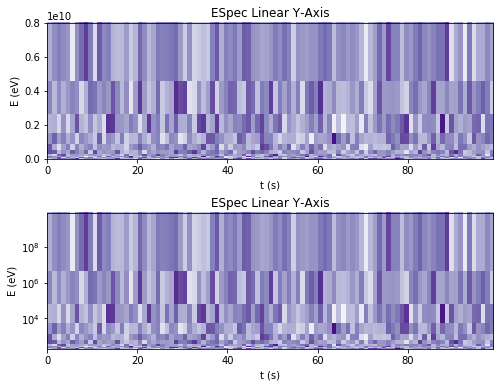

In [25]:
# Create a figure
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(8,6))
plt.subplots_adjust(hspace=0.4)

# Normal axes
ax = axes[0]
im = img.PcolorImage(ax, cmap='Purples', extent=(t[0], t[-1], E[0], E[-1]))
im.set_data(t, E, F[0:-1,0:-1])
ax.images.append(im)
ax.set_title('ESpec Linear Y-Axis')
ax.set_xlabel('t (s)')
ax.set_ylabel('E (eV)')

# Semi-log axes
ax = axes[1]
im = img.PcolorImage(ax, cmap='Purples', extent=(t[0], t[-1], E[0], E[-1]))
im.set_data(t, E, F[0:-1,0:-1])
ax.images.append(im)
ax.set_title('ESpec Linear Y-Axis')
ax.set_xlabel('t (s)')
ax.set_ylabel('E (eV)')
ax.set_yscale('log')

plt.show()

# pcolorfast
`pcolorfast(t, E, F)` where `t` and `E` are 1D arrays *should*  allow for non-uniform rectangular cells. However, if the E-coordinates are logarithmically spaced, an error occurs. To create a figure, I first have to take `log(E)`, which creates linearly spaced E coordinates (upper-left). Oddly enough, I can then log-scale the y-axis to get non-uniformly sized cells (upper-right).

`pcolorfast(t, E, F)` where `t` and `E` are 2D arrays does produce non-uniformly sized cells. When the y-axis is log-scaled, they become uniform (lower-left).

`pcolorfast(t, E, F)` where `t` and `E` are tuples produces equally sized cells uniformly distributed between `(tmin, tmax)` and `(Emin, Emax)` (lower-right).

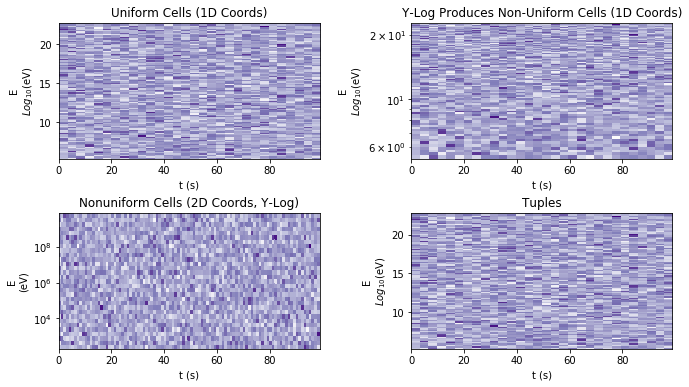

In [107]:
# Create a figure
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(11,6))
plt.subplots_adjust(hspace=0.4, wspace=0.35)

# From ax.pcolorfast:
#    In this case *x* and *y* have to be monotonic 1D arrays of length
#    *N+1* and *M+1*, specifying the x and y boundaries of the cells.
# However, if E is logarithmically spaced so that cells are not uniform
# in the y-direction, an error occurs. Must take log(E) to make it uniform
ax = axes[0,0]
im = ax.pcolorfast(t, np.log(E), F[0:-1,0:-1], cmap='Purples')
ax.images.append(im)
ax.set_title('Uniform Cells (1D Coords)')
ax.set_xlabel('t (s)')
ax.set_ylabel('E\n$Log_{10}$(eV)')

# See what happens when uniform cells are log-scaled.
ax = axes[0,1]
im = ax.pcolorfast(t, np.log(E), F[0:-1,0:-1], cmap='Purples')
ax.images.append(im)
ax.set_title('Y-Log Produces Non-Uniform Cells (1D Coords)')
ax.set_xlabel('t (s)')
ax.set_ylabel('E\n$Log_{10}$(eV)')
ax.set_yscale('log')

# 2D arrays create non-uniform
tp = np.repeat(t[:, np.newaxis], E.size, axis=1)
Ep = np.repeat(E[np.newaxis, :], t.size, axis=0)

ax = axes[1,0]
im = ax.pcolorfast(tp, Ep, F, cmap='Purples')
ax.images.append(im)
ax.set_title('Nonuniform Cells (2D Coords, Y-Log)')
ax.set_xlabel('t (s)')
ax.set_ylabel('E\n(eV)')
ax.set_yscale('log')

# Tuples define axis range, not individual cells
ax = axes[1,1]
im = ax.pcolorfast(tuple(t[[0,-1]]), tuple(np.log(E[[0,-1]])), F[0:-1,0:-1], cmap='Purples')
ax.images.append(im)
ax.set_title('Tuples')
ax.set_xlabel('t (s)')
ax.set_ylabel('E\n$Log_{10}$(eV)')

plt.show()

# pcolormesh
`pcolormesh(t, E, F)` where `t` and `E` are 1D arrays *should*  allow for non-uniform rectangular cells. However, if the E-coordinates are logarithmically spaced, an error occurs. To create a figure, I first have to take `log(E)`, which creates linearly spaced E coordinates (top). Oddly enough, I can then log-scale the y-axis to get non-uniformly sized cells (bottom).

`pcolormesh(t, E, F)` where `t` and `E` are 2D arrays does produce non-uniformly sized cells. When the y-axis is log-scaled, they become uniform (lower-left).

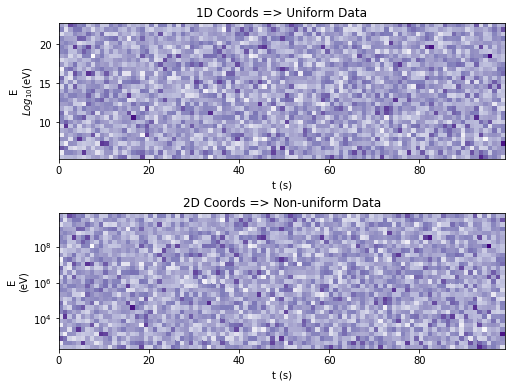

In [118]:
# Create a figure
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(8,6), squeeze=False)
plt.subplots_adjust(hspace=0.4)

# I have to take log(E), otherwise an error occurs
ax = axes[0,0]
im = ax.pcolorfast(t, np.log(E), F.transpose(), cmap='Purples')
ax.images.append(im)
ax.set_title('1D Coords => Uniform Data')
ax.set_xlabel('t (s)')
ax.set_ylabel('E\n$Log_{10}$(eV)')


# 2D arrays create non-uniform
tp = np.repeat(t[:, np.newaxis], E.size, axis=1)
Ep = np.repeat(E[np.newaxis, :], t.size, axis=0)

# However, I can log-scale the axis to get non-uniform pixel sizes
ax = axes[1,0]
im = ax.pcolorfast(tp, Ep, F, cmap='Purples')
ax.images.append(im)
ax.set_title('2D Coords => Non-uniform Data')
ax.set_xlabel('t (s)')
ax.set_ylabel('E\n(eV)')
ax.set_yscale('log')

plt.show()

# Summary
* NonUniformImage
  * Can plot non-uniformly spaced data
  * Log-scaling axes does not log-scale data
* PcolorImage
  * Can plot non-uniformly spaced data
  * Log-scaling axes does not log-scale data
* pcolorfast
  * Log-scaling axes also log-scales data
  * 1D coordinates must be uniformly distributed (contrary to documentation)
  * 2D coordinates can be non-uniformly distributed
* pcolorfast
  * Log-scaling axes also log-scales data
  * 1D coordinates must be uniformly distributed (contrary to documentation)
  * 2D coordinates can be non-uniformly distributed